In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [31]:
df= pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [32]:
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [33]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [34]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [35]:
x = df.iloc[:,0:4]
y = df['ShelveLoc']

In [36]:
x
pd.set_option("display.max_rows", None) 

In [37]:
x

,Sales,CompPrice,Income,Advertising
0,9.50,138,73,11
1,11.22,111,48,16
2,10.06,113,35,10
3,7.40,117,100,4
4,4.15,141,64,3
5,10.81,124,113,13
6,6.63,115,105,0
7,11.85,136,81,15
8,6.54,132,110,0
9,4.69,132,113,0


In [38]:
y

0      3
1      1
2      2
3      2
4      3
5      3
6      2
7      1
8      2
9      2
10     3
11     1
12     2
13     1
14     1
15     2
16     1
17     1
18     1
19     2
20     2
21     1
22     2
23     2
24     3
25     1
26     1
27     2
28     3
29     3
30     1
31     2
32     1
33     1
34     2
35     2
36     1
37     2
38     2
39     3
40     3
41     3
42     2
43     2
44     2
45     3
46     2
47     3
48     3
49     1
50     3
51     3
52     3
53     2
54     2
55     2
56     2
57     3
58     3
59     2
60     3
61     2
62     3
63     2
64     2
65     2
66     2
67     2
68     1
69     2
70     1
71     2
72     2
73     1
74     2
75     3
76     2
77     2
78     2
79     3
80     3
81     1
82     1
83     3
84     3
85     2
86     2
87     1
88     2
89     2
90     2
91     2
92     2
93     2
94     3
95     2
96     1
97     3
98     1
99     3
100    2
101    2
102    2
103    3
104    2
105    2
106    2
107    2
108    3
109    2
110    2
1

In [39]:
df['ShelveLoc'].unique()

array([3, 1, 2], dtype=int64)

In [40]:
df.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [41]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [42]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

# building tree using classifier entropy

In [43]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(167.4, 190.26, 'X[0] <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [67, 170, 83]'),
 Text(83.7, 135.9, 'X[0] <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [0, 53, 55]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 56.0\nentropy = 0.503\nsamples = 18\nvalue = [0, 2, 16]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 26.5\nentropy = 0.987\nsamples = 90\nvalue = [0, 51, 39]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.996\nsamples = 84\nvalue = [0, 45, 39]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [67, 117, 28]'),
 Text(209.25, 81.53999999999999, 'X[3] <= 15.5\nentropy = 1.281\nsamples = 160\nvalue = [31, 104, 25]'),
 Text(188.32500000000002, 27.18000

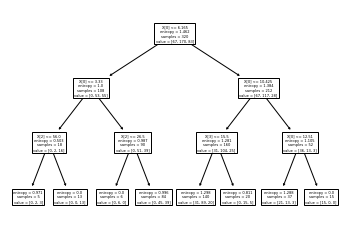

In [44]:
tree.plot_tree(model)

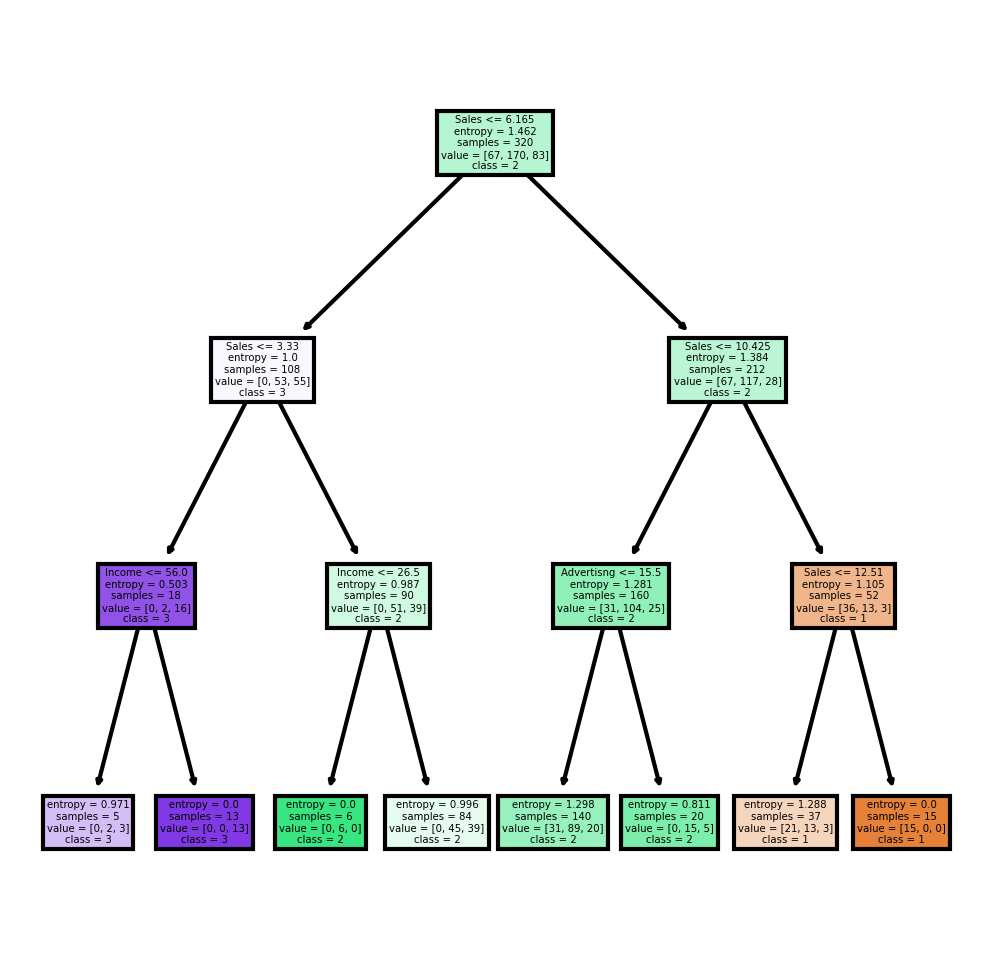

In [48]:
fn=['Sales','CompPrice','Income','Advertisng','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [49]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    63
1    13
3     4
dtype: int64

In [50]:
preds

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2], dtype=int64)

In [51]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2,3
ShelveLoc,,,
1,8,10,0
2,5,41,3
3,0,12,1


In [52]:
np.mean(preds==y_test)

0.625

# Building Decision Tree Classifier (CART) using Gini Criteria

In [53]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [54]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.625

# Decision Tree Regression Example

In [56]:
 #Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [57]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [61]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [62]:
#Find the accuracy
model.score(X_test,y_test)

-1.2064549650050433